In [90]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from clusteval import clusteval

In [3]:
data = pd.read_parquet('../data/doc_vec_embeddings.parquet')

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
course_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACCT 2025 Managerial Accounting (3),2.406243,2.432544,2.428724,2.458868,2.405982,2.460557,2.511211,2.368371,2.529852,2.469265,2.370985,2.391755,2.392006,2.483442,2.397095,2.508343,2.445762,2.531390,2.418849,2.334205,2.402004,2.494698,2.452269,2.485207,2.442474,2.420046,2.389095,2.481844,2.414999,2.409346,2.445177,2.358931,2.408251,2.439085,2.497073,2.477244,2.508061,2.437967,2.539705,2.424961,...,2.473624,2.398185,2.453660,2.470044,2.432339,2.517993,2.484403,2.400466,2.215511,2.395675,2.416097,2.507324,2.434957,2.462249,2.471130,2.387749,2.404431,2.409059,2.394254,2.402892,2.398146,2.449785,2.456517,2.518848,2.420747,2.448251,2.386365,2.483001,2.510915,2.447298,2.313676,2.485885,2.350307,2.414373,2.409247,2.404795,2.477599,2.460087,2.437086,2.427383
ACCT 3025 Advanced Managerial and Cost Accounting (3),2.773616,2.759825,2.778516,2.797933,2.722824,2.789580,2.875604,2.660324,2.891027,2.808136,2.757727,2.709062,2.787950,2.832399,2.718106,2.902353,2.759645,2.818547,2.716326,2.654220,2.747660,2.744391,2.786682,2.884010,2.770511,2.854566,2.651068,2.834122,2.747628,2.815232,2.787607,2.700876,2.753686,2.776949,2.773475,2.764585,2.770705,2.786479,2.891216,2.731376,...,2.873208,2.781132,2.763585,2.753577,2.753603,2.819983,2.756148,2.745144,2.577748,2.742453,2.784770,2.843492,2.793984,2.808248,2.783770,2.751462,2.768506,2.796733,2.783173,2.767037,2.785486,2.794817,2.828120,2.841540,2.792920,2.819775,2.769834,2.845822,2.836489,2.753132,2.645118,2.843481,2.678992,2.830539,2.758535,2.743963,2.790950,2.746460,2.802917,2.801929
ACCT 3030 Intermediate Accounting I (3),1.781800,1.780311,1.768644,1.804031,1.717707,1.815466,1.873826,1.688224,1.865257,1.815617,1.729334,1.735892,1.752104,1.793454,1.711354,1.858202,1.783366,1.846143,1.712682,1.733162,1.703348,1.761343,1.788514,1.858872,1.770800,1.836598,1.675002,1.880641,1.737604,1.771488,1.780996,1.697571,1.766570,1.757452,1.812109,1.742730,1.799392,1.779697,1.866987,1.746096,...,1.868321,1.740887,1.787641,1.768658,1.784244,1.851272,1.748854,1.704044,1.671100,1.759602,1.801586,1.826061,1.775109,1.773209,1.793480,1.761179,1.782113,1.797721,1.757836,1.740457,1.739407,1.810808,1.835710,1.836426,1.834433,1.832415,1.759981,1.847549,1.855137,1.809156,1.675673,1.846248,1.701234,1.862897,1.758677,1.773709,1.829507,1.764054,1.820252,1.793780
ACCT 3040 Intermediate Accounting II (3),3.259743,3.209680,3.276213,3.243070,3.229815,3.246566,3.291301,3.137723,3.318128,3.260963,3.180227,3.228750,3.227504,3.315424,3.074790,3.328334,3.241174,3.298799,3.205827,3.168334,3.193816,3.196535,3.166589,3.247604,3.229985,3.260880,3.124953,3.269347,3.167291,3.236029,3.204031,3.138318,3.217329,3.220026,3.272748,3.207040,3.270242,3.232869,3.300960,3.199931,...,3.344065,3.138776,3.222635,3.193391,3.162491,3.337061,3.187954,3.150859,3.092249,3.150557,3.248145,3.300915,3.260955,3.200156,3.259931,3.234257,3.213739,3.171943,3.183383,3.249028,3.235143,3.273509,3.243682,3.300326,3.288594,3.206328,3.280159,3.287259,3.318957,3.247285,3.080179,3.305067,3.163543,3.227564,3.275685,3.231016,3.251781,3.246040,3.243345,3.172720
ACCT 3050 International Tax Accounting (3),6.704301,6.661914,6.678912,6.711165,6.759267,6.631294,6.707876,6.569954,6.825742,6.691148,6.572253,6.695410,6.654020,6.764648,6.488818,6.757271,6.700773,6.750867,6.642312,6.653483,6.638098,6.692334,6.730593,6.680338,6.679590,6.600700,6.618899,6.720502,6.564293,6.634696,6.748731,6.549878,6.670052,6.604427,6.704675,6.680670,6.691239,6.631085,6.734996,6.612632,...,6.828190,6.653898,6.690911,6.667440,6.600053,6.820445,6.679415,6.578857,6.563084,6.675175,6.688851,6.733293,6.650212,6.604041,6.696045,6.679297,6.599040,6.65676

In [45]:
X = data.to_numpy()

In [50]:
ce = clusteval(cluster='dbscan', evaluate='silhouette', metric='euclidean')

In [51]:
# model = KMeans(random_state=42)
# model.fit(data.to_numpy)

result = ce.fit(X)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[dbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Gridsearch across Epsilon.
[clusteval] >INFO> Evaluate using silhouette..
[clusteval] >INFO: 100%|████████████████████████████████████████████████████████████████| 245/245 [00:43<00:00,  5.66it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [12].
[clusteval] >INFO> Fin.


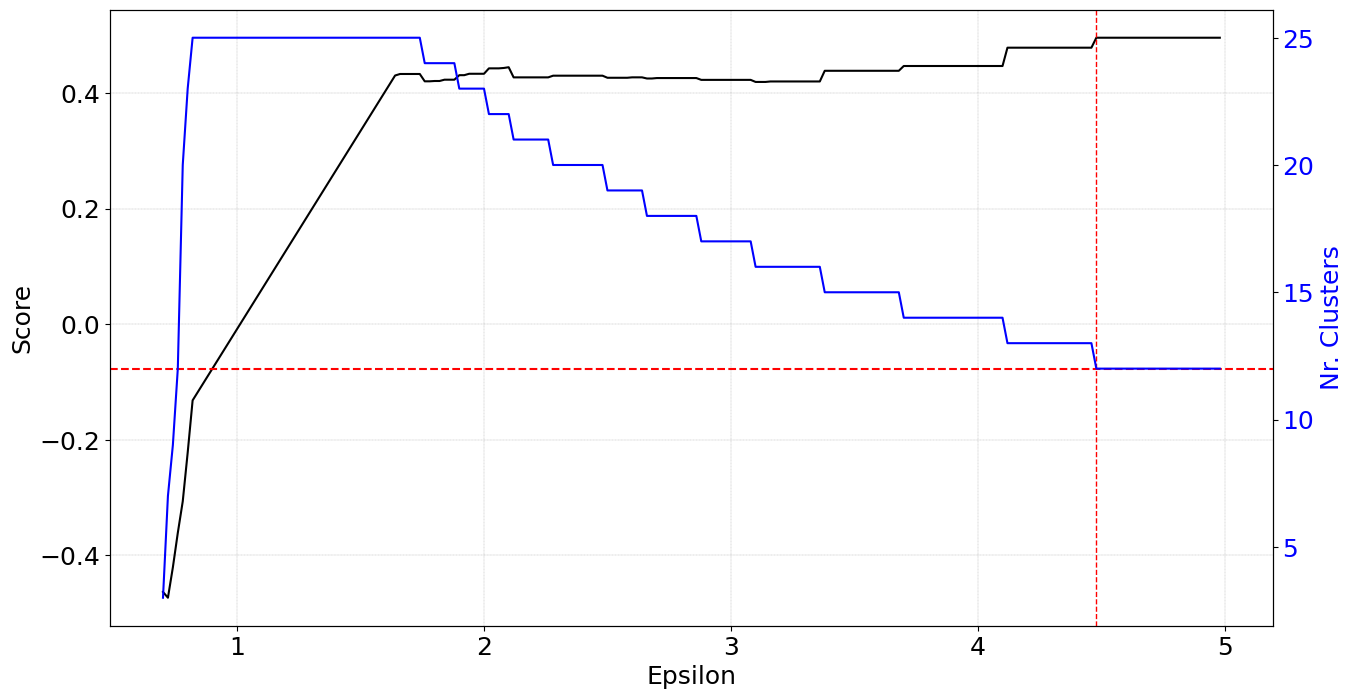

(<Figure size 1500x800 with 2 Axes>,
 (<Axes: xlabel='Epsilon', ylabel='Score'>, <Axes: ylabel='Nr. Clusters'>))

In [52]:
ce.plot()

[clusteval] >INFO> Retrieving input data set.
[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.
[clusteval] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

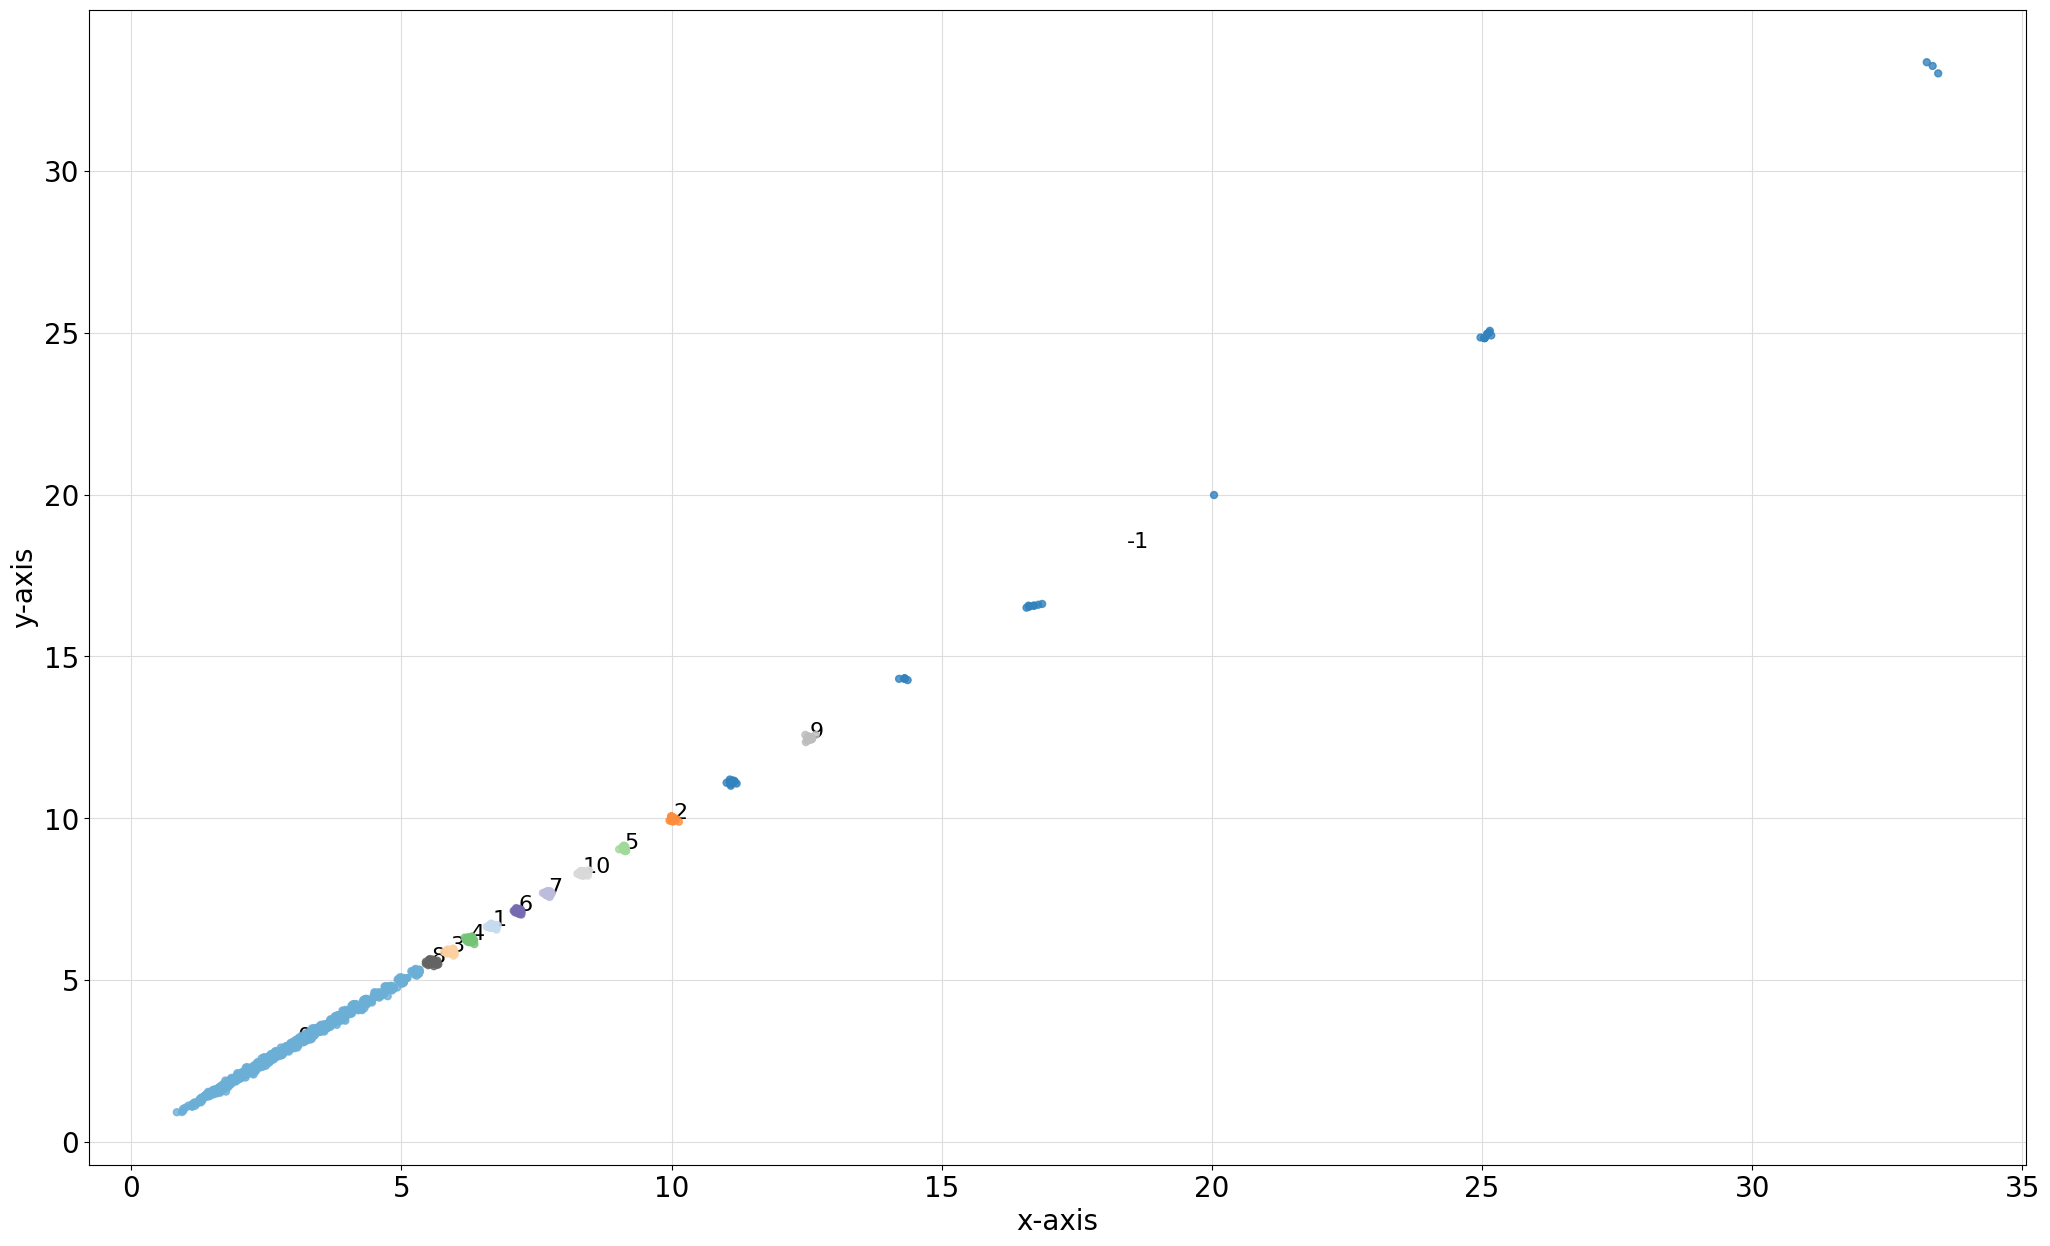

In [53]:
ce.scatter()

In [40]:
from sklearn.metrics.cluster import silhouette_score

silhouette_score(data.to_numpy(), labels)

0.54301006

In [55]:
ce.save(filepath='../data/dbscan_model_0.55.pkl')

[pypickle] Pickle file saved: [../data/dbscan_model_0.55.pkl]


True

In [84]:
data['clust_label'] = ce.results['labx']